### **Metode Korelasi**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/student_lifestyle_dataset.csv')
df.head()


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
# Mengganti Nama Variabel
df.rename(columns={"Study_Hours_Per_Day":"x1", "Extracurricular_Hours_Per_Day":"x2", "Sleep_Hours_Per_Day":"x3", "Social_Hours_Per_Day":"x4", "Physical_Activity_Hours_Per_Day":"x5", "GPA":"y"}, inplace=True)
df.head()

,Student_ID,x1,x2,x3,x4,x5,y,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
df.drop(columns=['Stress_Level'], inplace=True)

In [ ]:
# Menghitung Nilai Korelasi Pearson
from scipy.stats import pearsonr

# Convert dataframe into series
list1 = df["x1"]
list2 = df["x2"]
list3 = df["x3"]
list4 = df["x4"]
list5 = df["x5"]
list6 = df["y"]
corr, _ = pearsonr(list1, list6)
print('Pearsons correlation: %.5f' % (corr))


Pearsons correlation: 0.73447


Korelasi Pearson mengukur kekuatan dan arah hubungan linear antara dua variabel numerik.

In [ ]:
# Korelasi Biserial
import scipy.stats as stats
stats.pointbiserialr(df["x1"], df["y"])
stats.pointbiserialr(df["x2"], df["y"])
stats.pointbiserialr(df["x3"], df["y"])
stats.pointbiserialr(df["x4"], df["y"])
stats.pointbiserialr(df["x5"], df["y"])



SignificanceResult(statistic=-0.3411524640099619, pvalue=1.0809883562126855e-55)

Korelasi biserial digunakan ketika salah satu variabel bersifat kontinu (numerik) dan variabel lainnya bersifat dikotomi (biner, misalnya 0 atau 1). Korelasi ini mengukur kekuatan hubungan antara kedua variabel tersebut.

# **Interpretasi**



1.  **Korelasi Pearson:** Hasil perhitungan korelasi Pearson menunjukkan seberapa kuat hubungan linear antara dua variabel numerik dalam dataset. Nilai yang mendekati 1 atau -1 mengindikasikan hubungan yang kuat, sedangkan nilai yang mendekati 0 mengindikasikan tidak ada hubungan linear yang signifikan.
2.  **Korelasi Biserial:** Hasil perhitungan korelasi biserial menunjukkan kekuatan hubungan antara variabel kontinu dan variabel dikotomi. Nilai yang lebih besar (mendekati 1 atau -1) mengindikasikan hubungan yang lebih kuat.

Interpretasi hasil korelasi harus dilakukan dengan hati-hati. Korelasi tidak sama dengan kausalitas. Artinya, meskipun dua variabel memiliki korelasi yang tinggi, tidak berarti bahwa satu variabel menyebabkan perubahan pada variabel lainnya. Ada kemungkinan adanya variabel lain yang memengaruhi keduanya atau faktor kebetulan.


### Metode Statistika Deskriptif + Visualisasi

In [ ]:
import pandas as pd
df = pd.read_csv('/content/student_lifestyle_dataset.csv')
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [ ]:
from collections import defaultdict
import statsmodels.api as sm

# Select predictors and the target variable
predictors = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
              'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
              'Physical_Activity_Hours_Per_Day']
X = df[predictors]
y = df['GPA']

# Add a constant to the predictors for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     587.8
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        05:55:12   Log-Likelihood:                 358.07
No. Observations:                2000   AIC:                            -706.1
Df Residuals:                    1995   BIC:                            -678.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0232      0.000    154.922      0.000       0.023       0.024
Study_Hours_Per_Day                 0.2371      0.002     96.302      0.000       0.232       0.242
Extracurricular_Hours_Per_Day       0.0752      0.004     19.510      0.000       0.068       0.083
Sleep_Hours_Per_Day                 0.0781      0.002     32.396      0.000       0.073       0.083
Social_Hours_Per_Day                0.0840      0.003     33.187      0.000       0.079       0.089
Physical_Activity_Hours_Per_Day     0.0827      0.002     52.546      0.000       0.080       0.086
==============================================================================
Omnibus:                        0.939   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.850
Skew:                           0.028   Prob(JB):                        0.654
Kurtosis:                       3.084   Cond. No.                     1.56e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# Extract coefficients and standard errors from the model
coefficients = model.params
std_errors = model.bse

# Compute z-scores
z_scores = coefficients / std_errors

# Compute p-values for z-scores
from scipy.stats import norm
p_values_z = 2 * (1 - norm.cdf(abs(z_scores)))

# Combine the results in a DataFrame
z_test_results = pd.DataFrame({
    'Coefficient': coefficients,
    'Std Error': std_errors,
    'Z-Score': z_scores,
    'P-Value (Z-Test)': p_values_z
})

# Display the z-test results
print(z_test_results)


                                 Coefficient  Std Error     Z-Score  \
const                               0.023209   0.000150  154.922036   
Study_Hours_Per_Day                 0.237055   0.002462   96.301532   
Extracurricular_Hours_Per_Day       0.075174   0.003853   19.509581   
Sleep_Hours_Per_Day                 0.078122   0.002411   32.395910   
Social_Hours_Per_Day                0.083983   0.002531   33.186530   
Physical_Activity_Hours_Per_Day     0.082671   0.001573   52.545785   

                                 P-Value (Z-Test)  
const                                         0.0  
Study_Hours_Per_Day                           0.0  
Extracurricular_Hours_Per_Day                 0.0  
Sleep_Hours_Per_Day                           0.0  
Social_Hours_Per_Day                          0.0  
Physical_Activity_Hours_Per_Day               0.0  


In [ ]:
# Mengecek  kolom
print(df.columns)

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


In [ ]:
# Extract coefficients and standard errors from the model
coefficients = model.params
std_errors = model.bse

# Compute t-scores
t_scores = coefficients / std_errors

# Compute p-values for t-scores
from scipy.stats import t
degrees_of_freedom = model.df_resid  # Residual degrees of freedom
p_values_t = 2 * (1 - t.cdf(abs(t_scores), df=degrees_of_freedom))

# Combine the results in a DataFrame
t_test_results = pd.DataFrame({
    'Coefficient': coefficients,
    'Std Error': std_errors,
    'T-Score': t_scores,
    'P-Value (T-Test)': p_values_t
})

# Display the t-test results
print(t_test_results)


                                 Coefficient  Std Error     T-Score  \
const                               0.023209   0.000150  154.922036   
Study_Hours_Per_Day                 0.237055   0.002462   96.301532   
Extracurricular_Hours_Per_Day       0.075174   0.003853   19.509581   
Sleep_Hours_Per_Day                 0.078122   0.002411   32.395910   
Social_Hours_Per_Day                0.083983   0.002531   33.186530   
Physical_Activity_Hours_Per_Day     0.082671   0.001573   52.545785   

                                 P-Value (T-Test)  
const                                         0.0  
Study_Hours_Per_Day                           0.0  
Extracurricular_Hours_Per_Day                 0.0  
Sleep_Hours_Per_Day                           0.0  
Social_Hours_Per_Day                          0.0  
Physical_Activity_Hours_Per_Day               0.0  


   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.8

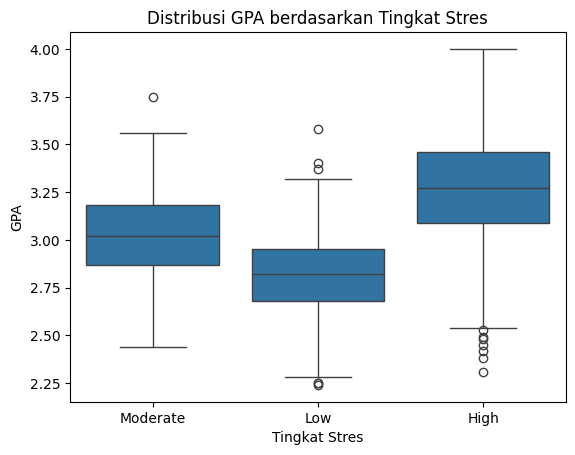

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Step 1: Membaca Dataset
data_path = ('/content/student_lifestyle_dataset.csv')
data = pd.read_csv(data_path)

# Menampilkan 5 baris pertama untuk melihat struktur dataset
print(data.head())

# Step 2: Uji T untuk membandingkan rata-rata GPA berdasarkan Stress_Level
# Memilih dua grup: Low dan High stress level
if 'Stress_Level' in data.columns and 'GPA' in data.columns:
    group_low = data[data['Stress_Level'] == 'Low']['GPA']
    group_high = data[data['Stress_Level'] == 'High']['GPA']

    # Melakukan uji t
    t_stat, p_value = ttest_ind(group_low, group_high, nan_policy='omit')

    # Menampilkan hasil
    print(f"Uji T - Statistik: {t_stat}, P-value: {p_value}")

    if p_value < 0.05:
        print("Hipotesis nol ditolak: terdapat perbedaan signifikan antara GPA siswa dengan tingkat stres rendah dan tinggi.")
    else:
        print("Gagal menolak hipotesis nol: tidak ada bukti cukup untuk perbedaan signifikan.")

# Step 3: Visualisasi distribusi GPA berdasarkan Stress_Level
sns.boxplot(data=data, x='Stress_Level', y='GPA')
plt.title('Distribusi GPA berdasarkan Tingkat Stres')
plt.xlabel('Tingkat Stres')
plt.ylabel('GPA')
plt.show()



In [ ]:
import pandas as pd

# Load the dataset (replace 'student_lifestyle_dataset.csv' with the path to your file)
file_path = ("/content/student_lifestyle_dataset.csv")
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("\nPreview of the dataset:")
print(data.head())

# Calculate descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
numerical_stats = data.describe()
print(numerical_stats)

# Calculate the distribution of the categorical column 'Stress_Level'
print("\nDistribution of Stress_Level:")
categorical_distribution = data['Stress_Level'].value_counts()
print(categorical_distribution)

# Save the outputs to CSV files (optional)
numerical_stats.to_csv('numerical_statistics.csv', index=True)
categorical_distribution.to_csv('categorical_distribution.csv', header=['Count'])



Preview of the dataset:
   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2

Statistik Deskriptif:
         Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                       1.990100   
std     577.494589             1.423888                       1.155855   
min       1.000000             5.000000                       0.000000   
25%     500.750000             6.300000                       1.000000   
50%    1000.500000             7.400000                       2.000000   
75%    1500.250000             8.700000                       3.000000   
max    2000.000000            10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000  

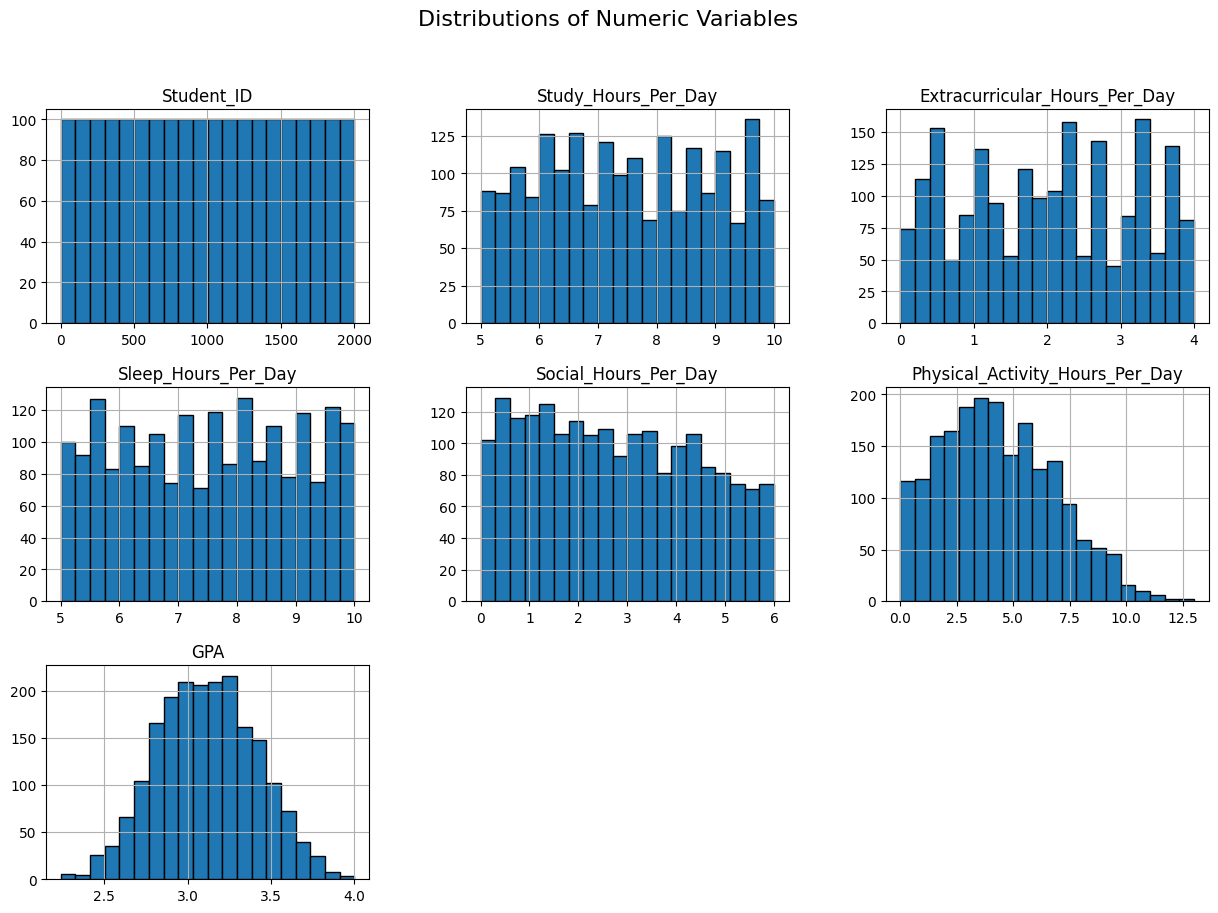

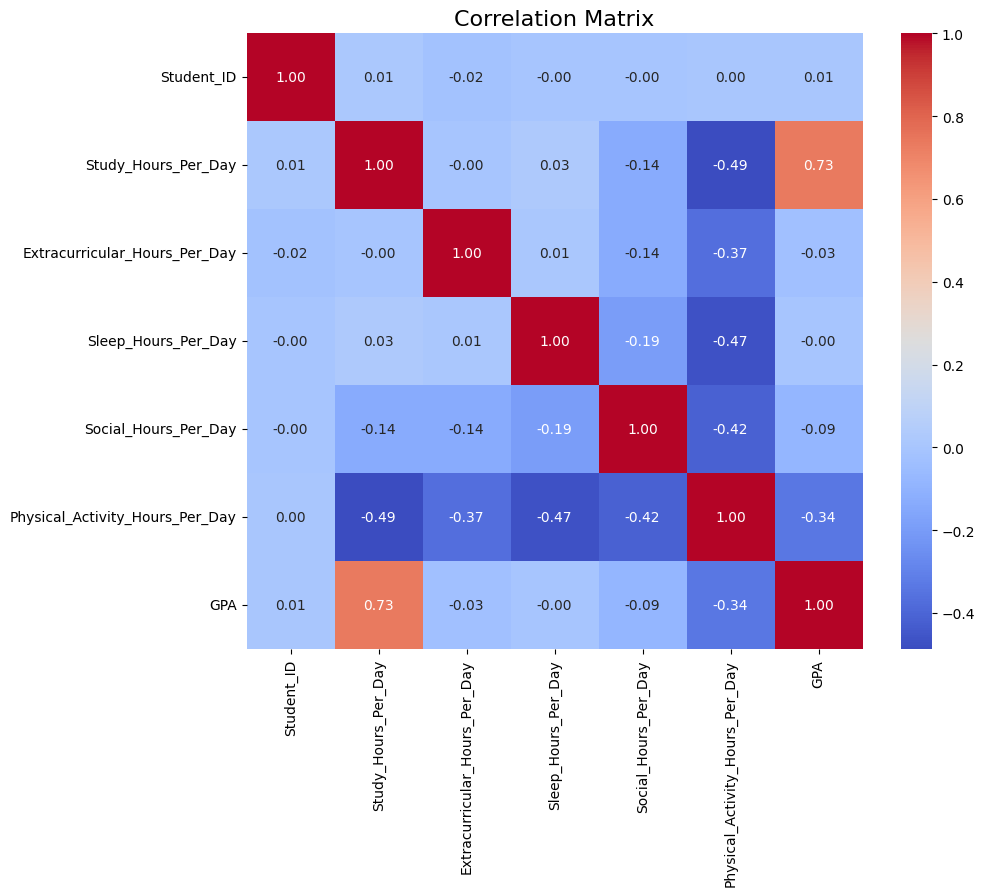

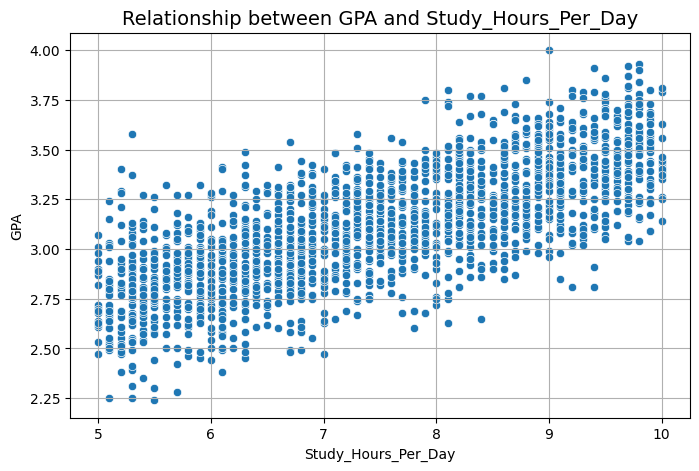

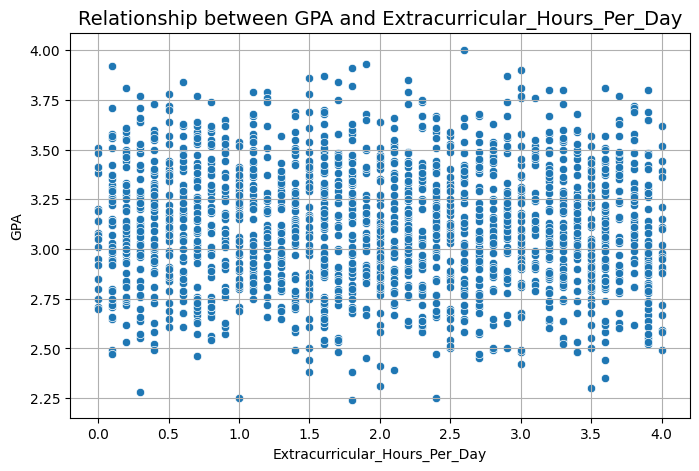

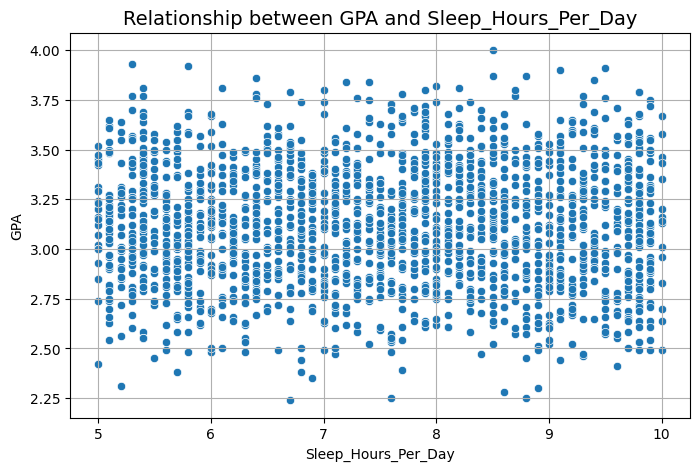

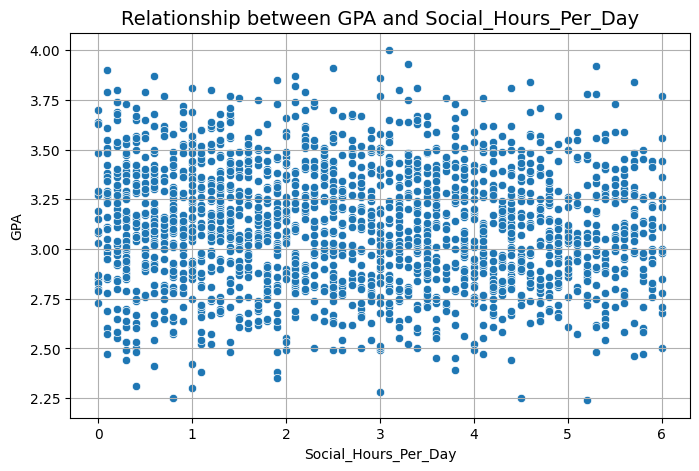

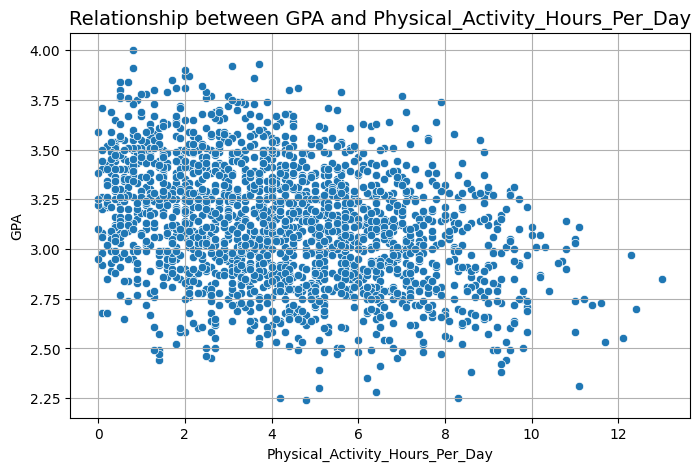

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = ("/content/student_lifestyle_dataset.csv")
data = pd.read_csv(data)

# Statistik deskriptif
def descriptive_statistics(data):
    desc_stats = data.describe()
    return desc_stats

# Visualisasi: Distribusi tiap variabel numerik
def plot_distributions(data):
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[num_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
    plt.suptitle('Distributions of Numeric Variables', fontsize=16)
    plt.show()

# Visualisasi: Korelasi antar variabel numerik
def plot_correlation_matrix(data):
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    corr_matrix = data[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

# Visualisasi: Hubungan GPA dengan variabel lain

def plot_gpa_relationships(data):
    numeric_features = [
        'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
        'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
        'Physical_Activity_Hours_Per_Day'
    ]
    for feature in numeric_features:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=data[feature], y=data['GPA'])
        plt.title(f'Relationship between GPA and {feature}', fontsize=14)
        plt.xlabel(feature)
        plt.ylabel('GPA')
        plt.grid()
        plt.show()

# Eksekusi fungsi
statistics = descriptive_statistics(data)
print("Statistik Deskriptif:\n", statistics)

plot_distributions(data)
plot_correlation_matrix(data)
plot_gpa_relationships(data)


Statistik Deskriptif:
         Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                       1.990100   
std     577.494589             1.423888                       1.155855   
min       1.000000             5.000000                       0.000000   
25%     500.750000             6.300000                       1.000000   
50%    1000.500000             7.400000                       2.000000   
75%    1500.250000             8.700000                       3.000000   
max    2000.000000            10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000  

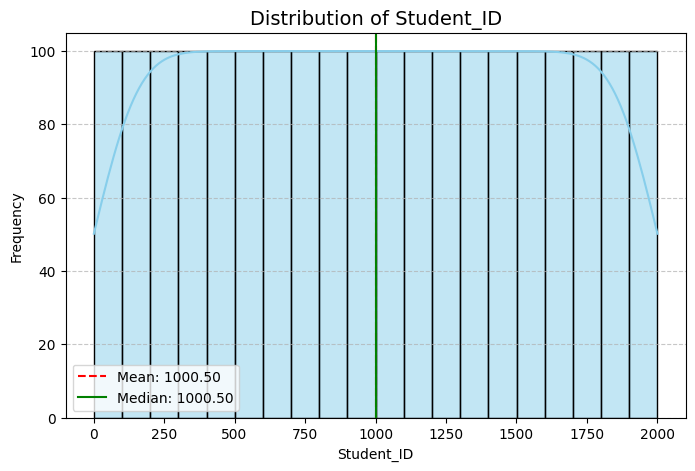

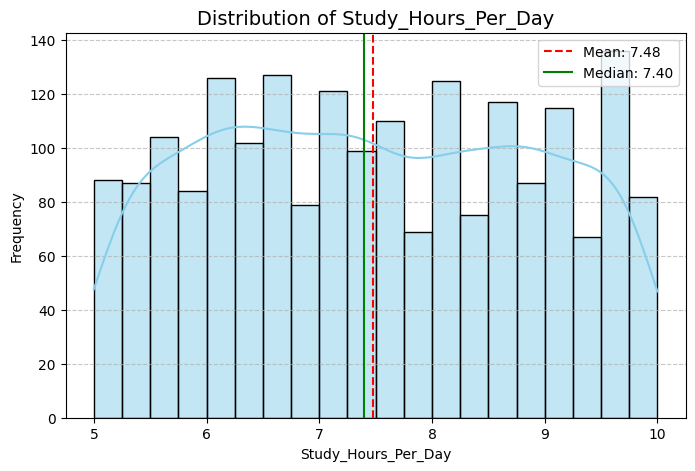

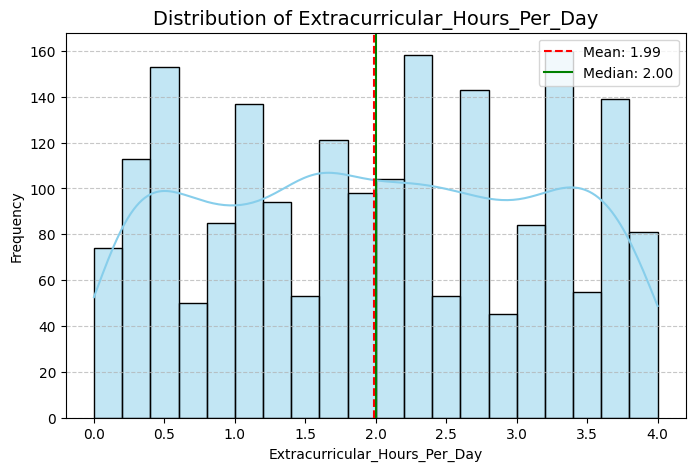

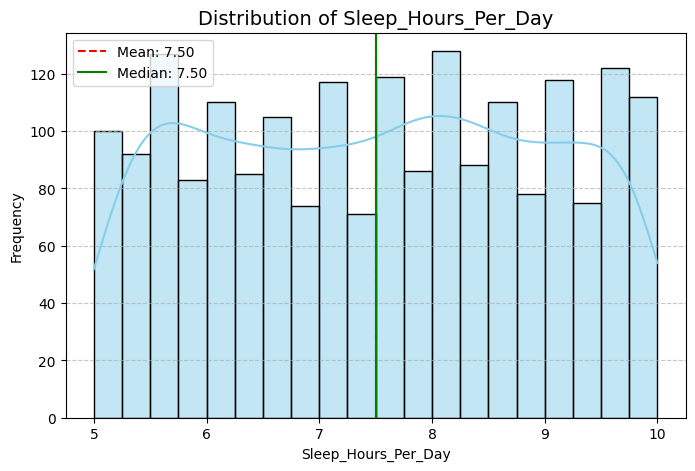

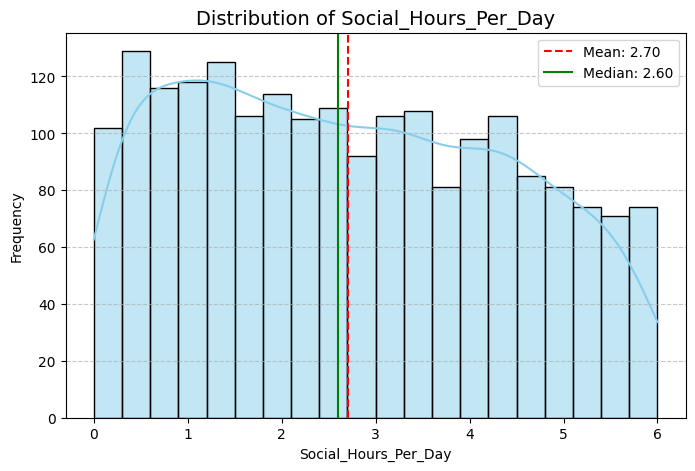

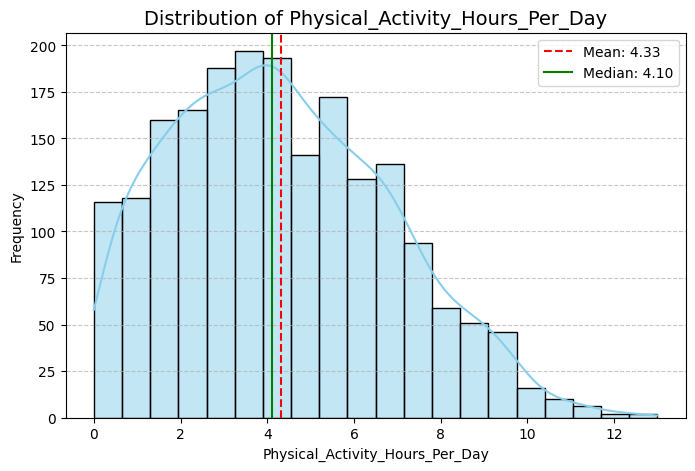

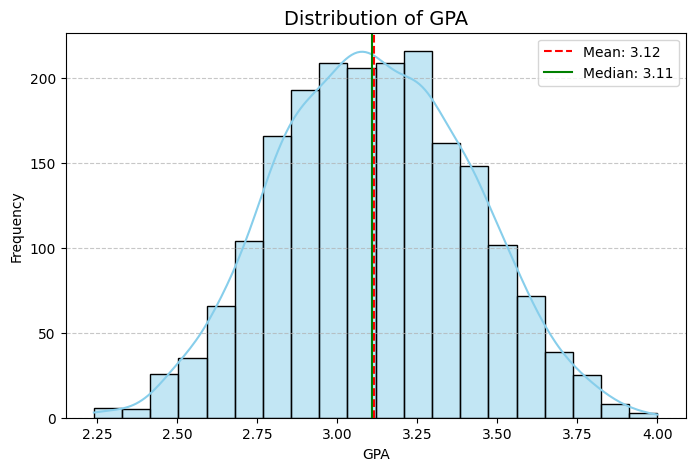

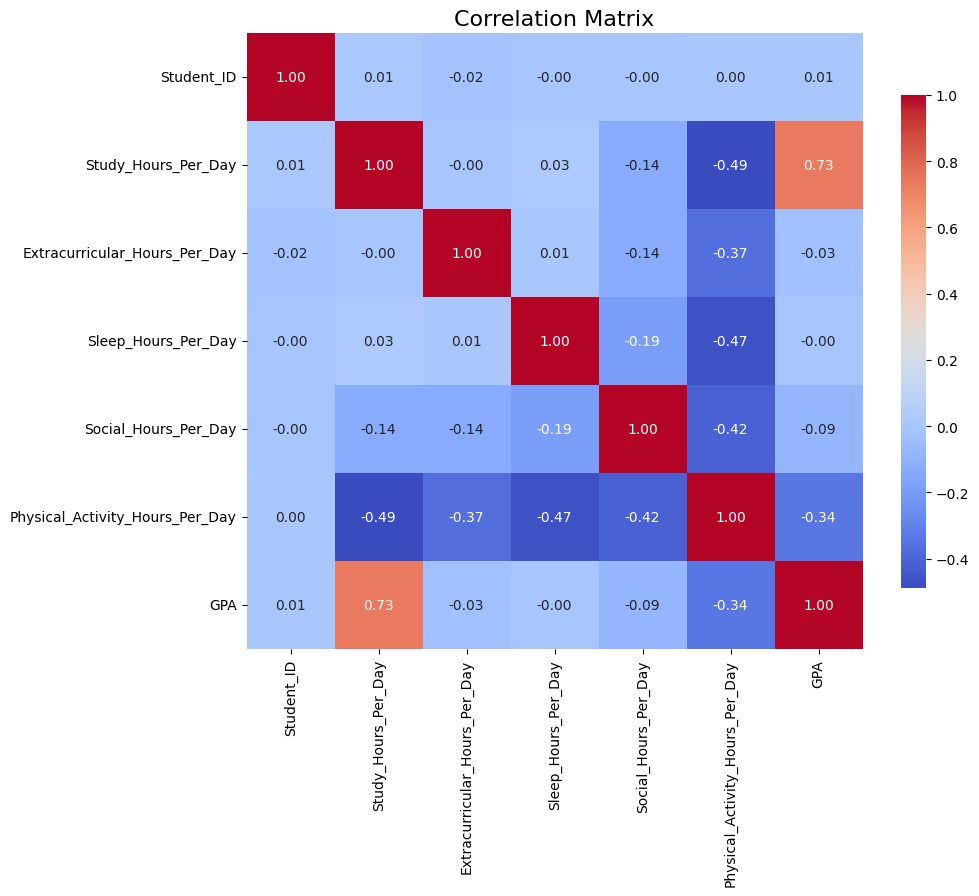

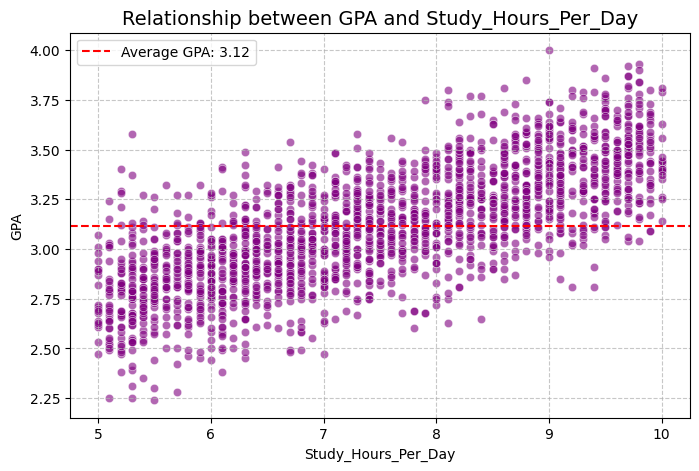

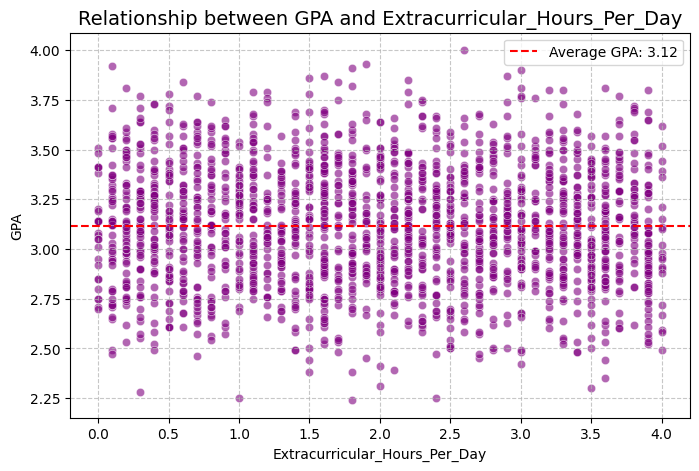

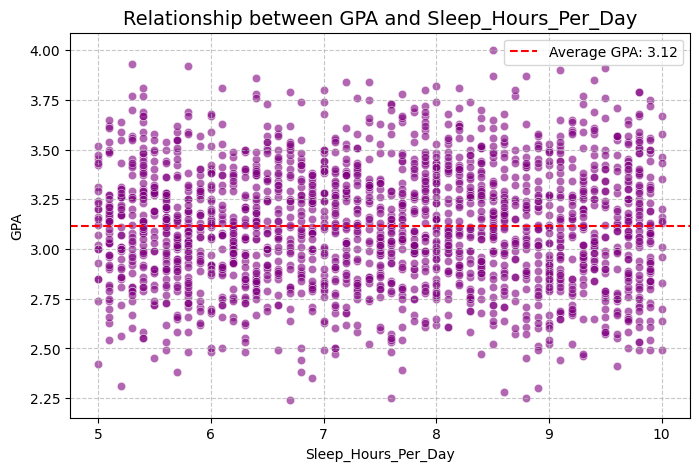

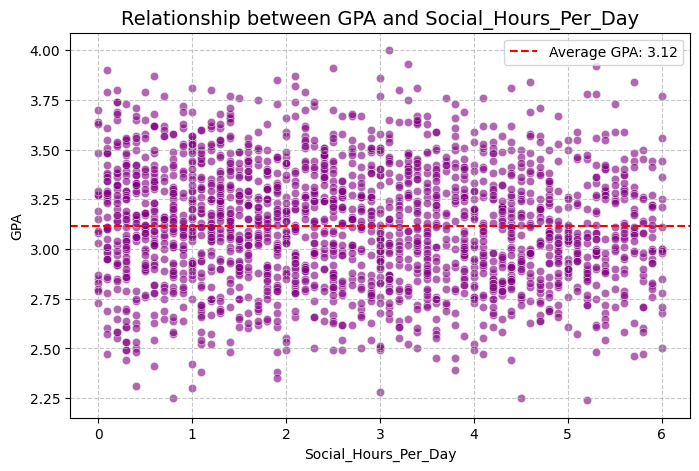

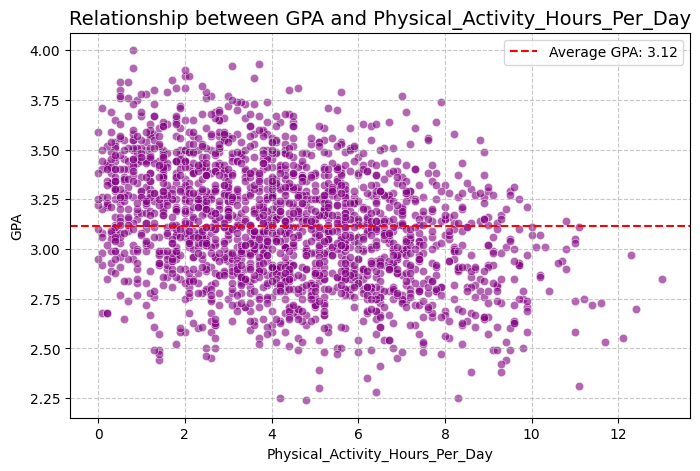

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = ("/content/student_lifestyle_dataset.csv")
data = pd.read_csv(data)
# Statistik deskriptif
def descriptive_statistics(data):
    desc_stats = data.describe()
    return desc_stats

# Visualisasi: Distribusi tiap variabel numerik
def plot_distributions(data):
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[col], kde=True, bins=20, color='skyblue', edgecolor='black')
        plt.axvline(data[col].mean(), color='red', linestyle='--', label=f'Mean: {data[col].mean():.2f}')
        plt.axvline(data[col].median(), color='green', linestyle='-', label=f'Median: {data[col].median():.2f}')
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Visualisasi: Korelasi antar variabel numerik
def plot_correlation_matrix(data):
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    corr_matrix = data[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

# Visualisasi: Hubungan GPA dengan variabel lain
def plot_gpa_relationships(data):
    numeric_features = [
        'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
        'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
        'Physical_Activity_Hours_Per_Day'
    ]
    for feature in numeric_features:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=data[feature], y=data['GPA'], color='purple', alpha=0.6, edgecolor='w')
        plt.axhline(data['GPA'].mean(), color='red', linestyle='--', label=f'Average GPA: {data["GPA"].mean():.2f}')
        plt.title(f'Relationship between GPA and {feature}', fontsize=14)
        plt.xlabel(feature)
        plt.ylabel('GPA')
        plt.legend()
        plt.grid(axis='both', linestyle='--', alpha=0.7)
        plt.show()

# Eksekusi fungsi
statistics = descriptive_statistics(data)
print("Statistik Deskriptif:\n", statistics)

plot_distributions(data)
plot_correlation_matrix(data)
plot_gpa_relationships(data)


###**Model Regresi**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/student_lifestyle_dataset.csv')
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
# Mengganti Nama Variabel
df.rename(columns={"Study_Hours_Per_Day":"x1", "Extracurricular_Hours_Per_Day":"x2", "Sleep_Hours_Per_Day":"x3", "Social_Hours_Per_Day":"x4", "Physical_Activity_Hours_Per_Day":"x5", "GPA":"y"}, inplace=True)


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Asumsikan df sudah di-load sebelumnya
list1 = df["x1"]
list7 = df["y"]

# Menghitung korelasi Pearson
corr, _ = pearsonr(list1, list7)
print('Pearsons correlation: %.5f' % corr)


Pearsons correlation: 0.73447


In [ ]:
import scipy.stats as stats
#menghitung korelasi biserial poin type
stats.pointbiserialr(df["x1"], df["y"])

SignificanceResult(statistic=0.7344679806560518, pvalue=0.0)

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Membaca data dari file CSV
file_path = ("/content/student_lifestyle_dataset.csv")
df = pd.read_csv(file_path)

# Membuat variabel dummy berdasarkan Student_ID (atau kolom kategori lain jika diperlukan)
df_with_dummies = pd.get_dummies(data=df, columns=["Student_ID"], drop_first=True)

# Tentukan formula regresi
# Pastikan untuk mengganti 'x1', 'x2', dll., dengan nama kolom prediktor yang sesuai
reg_mod = ("GPA ~ Study_Hours_Per_Day + Extracurricular_Hours_Per_Day + Sleep_Hours_Per_Day + Social_Hours_Per_Day + Physical_Activity_Hours_Per_Day")  # Sesuaikan formula ini dengan dataset Anda

# Membuat model regresi linear
model = smf.ols(formula=reg_mod, data=df_with_dummies).fit()

# Menampilkan ringkasan model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     587.8
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:38:50   Log-Likelihood:                 358.07
No. Observations:                2000   AIC:                            -706.1
Df Residuals:                    1995   BIC:                            -678.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
data = ("/content/student_lifestyle_dataset.csv")
data = pd.read_csv(data)
# Statistik deskriptif
def descriptive_statistics(data):
    desc_stats = data.describe()
    return desc_stats
print(data)


      Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0              1                  6.9                            3.8   
1              2                  5.3                            3.5   
2              3                  5.1                            3.9   
3              4                  6.5                            2.1   
4              5                  8.1                            0.6   
...          ...                  ...                            ...   
1995        1996                  6.5                            0.2   
1996        1997                  6.3                            2.8   
1997        1998                  6.2                            0.0   
1998        1999                  8.1                            0.7   
1999        2000                  9.0                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0                     8.7                   2.8   
1                     8.0        

Berdasarkan hasil analisis regresi, dapat disimpulkan bahwa model regresi linear berganda yang dibangun dapat menjelaskan sekitar 54.1% variabilitas dalam variabel dependen. Semua variabel independen (x1, x2, x3, x4, x5) memiliki pengaruh yang signifikan terhadap variabel dependen.

### Metode Klasifikasi

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
dataset = pd.read_csv("//content//student_lifestyle_dataset.csv")
dataset.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
# Menampilkan columns data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [ ]:
# Mengetahui apakah ada data kosong
dataset.empty

False

In [ ]:
en = LabelEncoder()

dataset["Stress_Level"] = en.fit_transform(dataset["Stress_Level"])
dataset.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,2
1,2,5.3,3.5,8.0,4.2,3.0,2.75,1
2,3,5.1,3.9,9.2,1.2,4.6,2.67,1
3,4,6.5,2.1,7.2,1.7,6.5,2.88,2
4,5,8.1,0.6,6.5,2.2,6.6,3.51,0


In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
x

array([[1.000e+00, 6.900e+00, 3.800e+00, ..., 2.800e+00, 1.800e+00,
        2.990e+00],
       [2.000e+00, 5.300e+00, 3.500e+00, ..., 4.200e+00, 3.000e+00,
        2.750e+00],
       [3.000e+00, 5.100e+00, 3.900e+00, ..., 1.200e+00, 4.600e+00,
        2.670e+00],
       ...,
       [1.998e+03, 6.200e+00, 0.000e+00, ..., 8.000e-01, 1.080e+01,
        3.140e+00],
       [1.999e+03, 8.100e+00, 7.000e-01, ..., 3.500e+00, 4.100e+00,
        3.040e+00],
       [2.000e+03, 9.000e+00, 1.700e+00, ..., 3.100e+00, 2.900e+00,
        3.580e+00]])

In [ ]:
y

array([2, 1, 1, ..., 2, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  1600
x_test =  400
y_train =  1600
y_test =  400


In [ ]:
# Mengskalakan data
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.44358348, -0.26904367, -1.20144885, ...,  0.24238655,
         0.22276103, -1.10110269],
       [-0.49091397, -0.55192184,  0.77792697, ...,  1.72351427,
        -1.53930377, -0.19725614],
       [-1.37368647, -1.54199546,  1.63852516, ...,  1.36804361,
        -1.5793507 , -0.13030454],
       ...,
       [ 0.68841492,  0.08455405, -0.34085067, ..., -1.29798627,
         0.82346495, -0.76634471],
       [ 0.65910411,  1.56966448,  1.20822607, ..., -1.4757216 ,
        -0.89855293,  1.37610637],
       [ 0.90910804, -1.32983683, -1.11538904, ...,  0.89408275,
        -0.2578021 , -1.23500588]])

In [ ]:
x_test

array([[ 0.57806836,  1.00390813, -0.34085067, ..., -1.12025095,
         0.06257332,  0.60616301],
       [ 0.5711717 , -0.4812023 ,  0.86398679, ...,  1.30879851,
        -1.1388345 , -0.43158673],
       [-1.40989394,  1.07462767,  0.69186715, ...,  0.42012188,
        -0.77841215,  0.40530823],
       ...,
       [-1.18575248, -0.55192184,  1.63852516, ...,  0.95332785,
        -1.37911606, -0.9671995 ],
       [-1.18402831, -1.25911728,  1.20822607, ..., -0.05383899,
        -0.65827137,  0.03707445],
       [ 0.50910175,  1.56966448, -1.37356849, ...,  1.66426916,
        -1.41916299,  2.04562233]])

In [ ]:
y_train

array([2, 2, 1, ..., 2, 0, 1])

In [ ]:
y_test

array([0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1,
       0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2,

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1,
       1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0,
       2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2,

In [ ]:
# Hasil Prediksi Probabilitas
classifier.predict_proba(x_test)

array([[9.92193236e-01, 3.24003449e-35, 7.80676434e-03],
       [1.09542794e-01, 2.76571141e-06, 8.90454440e-01],
       [9.98619057e-01, 1.78524139e-37, 1.38094279e-03],
       ...,
       [1.03943318e-01, 5.81819806e-05, 8.95998500e-01],
       [1.01269981e-01, 6.49607520e-01, 2.49122499e-01],
       [9.99998136e-01, 3.20976766e-55, 1.86390675e-06]])

In [ ]:
# Evaluasi
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[164  18  11]
 [  0  59   4]
 [ 27   4 113]]


**Interpretasi**



*   Diagonal: Nilai pada diagonal menunjukkan jumlah sampel yang diklasifikasikan dengan benar.
*   Non-diagonal: Nilai di luar diagonal menunjukkan jumlah sampel yang salah diklasifikasikan.
*  Contoh: Nilai 164 pada baris pertama dan kolom pertama berarti ada 164 sampel dari kelas 0 yang berhasil diklasifikasikan sebagai kelas 0.






In [ ]:
akurasi = classification_report(y_test, y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       193
           1       0.73      0.94      0.82        63
           2       0.88      0.78      0.83       144

    accuracy                           0.84       400
   macro avg       0.82      0.86      0.83       400
weighted avg       0.85      0.84      0.84       400



# **Interpretasi Keseluruhan**

Akurasi: Model berhasil mengklasifikasikan sekitar 84% dari data uji dengan benar.

*   Akurasi: Model berhasil mengklasifikasikan sekitar 84% dari data uji dengan benar.
*   Precision, Recall, dan F1-score: Nilai precision, recall, dan F1-score yang cukup tinggi untuk setiap kelas menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi sampel positif dan negatif.

*   Matriks Konfusi: Matriks konfusi menunjukkan bahwa model cenderung lebih baik dalam mengklasifikasikan kelas 0 dan 2 dibandingkan dengan kelas 1.




### Diperoleh hasil klasifikasi Naives Bayes yaitu 0.84

In [ ]:
akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi : %d persen"%(akurasi*100))

Tingkat Akurasi : 84 persen


### Diperoleh akurasi skore yaitu 84%

In [ ]:
ydata = pd.DataFrame()
ydata["y_test"] = pd.DataFrame(y_test)
ydata["y_pred"] = pd.DataFrame(y_pred)
ydata

,y_test,y_pred
0,0,0
1,2,2
2,0,0
3,0,2
4,0,0
...,...,...
395,2,2
396,1,1
397,2,2
398,1,1


In [ ]:
ydata.to_csv("DataActualPrediksi.csv", index=False)

## **Interpretasi**


*   Perbandingan y_test dan y_pred: Dengan membandingkan nilai y_test dan y_pred secara baris per baris, Anda dapat melihat secara detail mana saja prediksi yang benar dan mana yang salah.
*   Matriks Konfusi: Untuk mendapatkan gambaran yang lebih lengkap tentang kinerja model, Anda dapat membuat matriks konfusi. Matriks konfusi akan menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.


## **Hasil dan Kesimpulan**



1.   **Identifikasi Pola:**

     Clustering mengungkapkan adanya pola tertentu dalam gaya hidup mahasiswa yang memengaruhi GPA dan keseimbangan hidup.
     Contohnya, mahasiswa dengan waktu belajar terstruktur dan tidur cukup cenderung memiliki performa akademik yang lebih baik.
2.   **Pendekatan Personalisasi:**

     Kluster ini memungkinkan institusi untuk mengembangkan kebijakan atau intervensi yang sesuai dengan kebutuhan masing-masing kelompok mahasiswa.
     Misalnya, mahasiswa dengan waktu tidur rendah dapat diarahkan untuk manajemen waktu yang lebih baik.
3. **Dampak Praktis:**

     Analisis ini dapat mendukung perencanaan program kampus yang lebih efektif, seperti bimbingan akademik, program kesehatan, atau aktivitas sosial.

In [ ]:
print(df.keys())

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


In [ ]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
print(df.columns)

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


In [ ]:
print(df.head())

   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.8

In [ ]:
df.isna().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


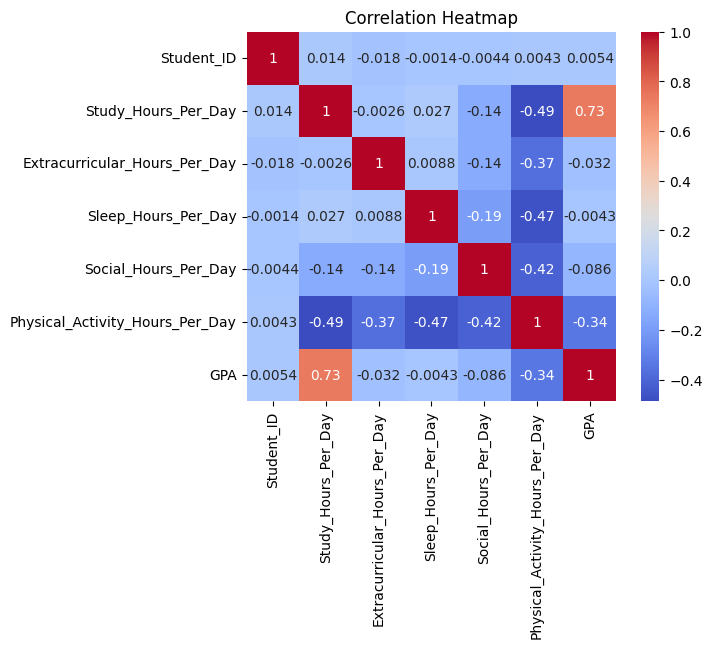

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Periksa apakah kolom numerik ditemukan
if not df_numeric.empty:
    # Plot heatmap
    sns.heatmap(df_numeric.corr(), square=True, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Tidak ada kolom numerik dalam dataset.")


Kolom dalam DataFrame: Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


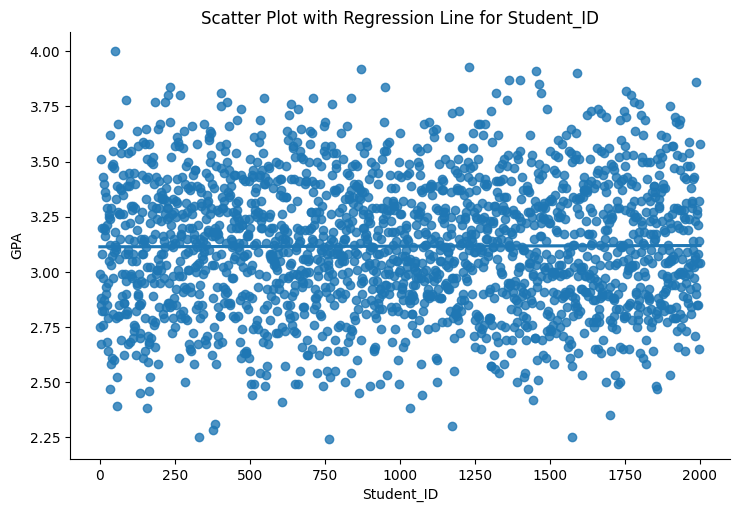

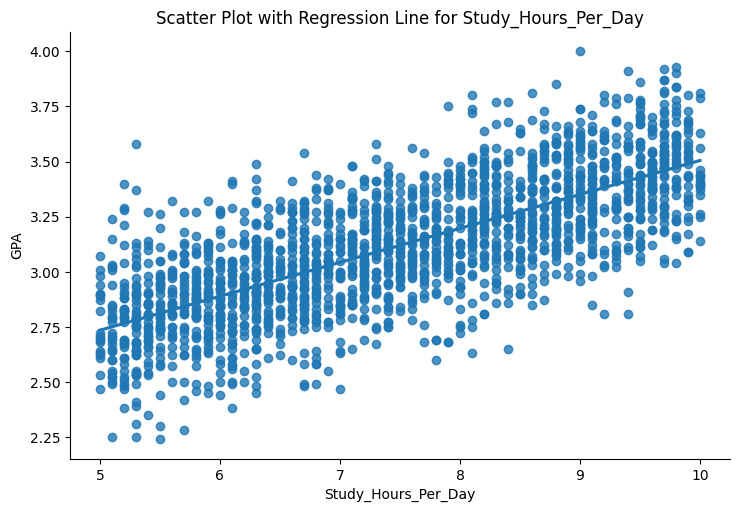

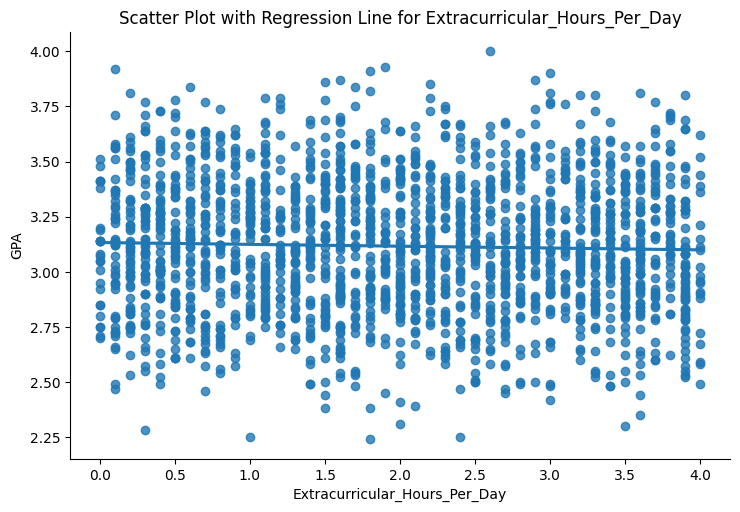

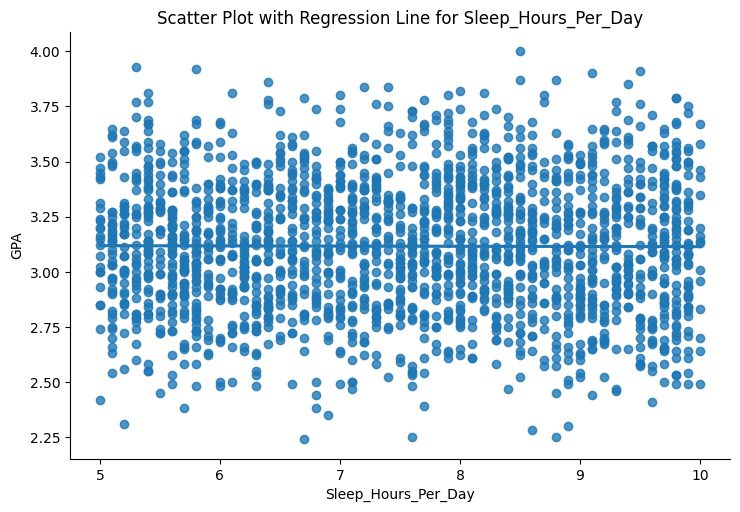

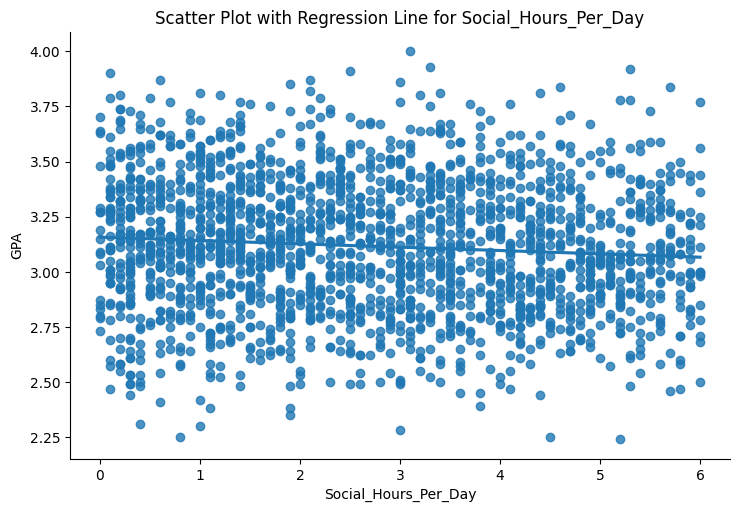

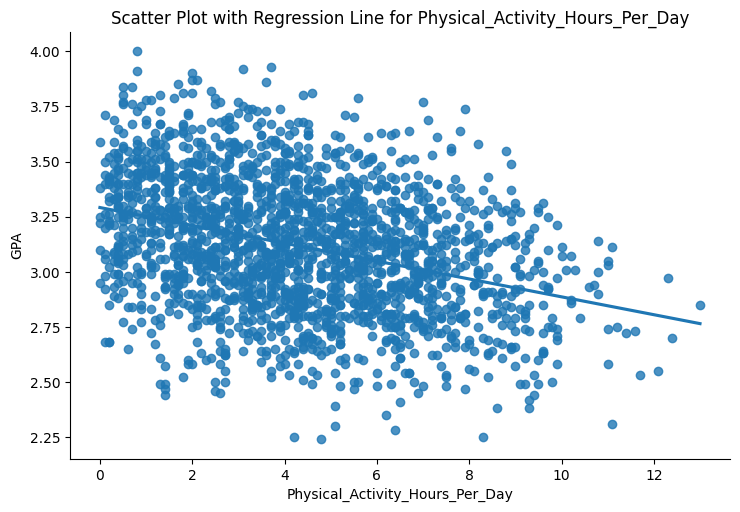

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kolom untuk x (sesuaikan dengan nama kolom di dataset)
x_columns = ["Student_ID", "Study_Hours_Per_Day", "Extracurricular_Hours_Per_Day", "Sleep_Hours_Per_Day", "Social_Hours_Per_Day", "Physical_Activity_Hours_Per_Day"]  # Ganti sesuai nama kolom
y_column = "GPA"  # Ganti dengan nama kolom target

# Periksa kolom dalam DataFrame
print("Kolom dalam DataFrame:", df.columns)

# Buat scatter plot dengan garis regresi untuk setiap kolom
for col in x_columns:
    if col in df.columns and y_column in df.columns:
        sns.lmplot(x=col, y=y_column, data=df, height=5, aspect=1.5, ci=None)  # `ci=None` untuk menghapus interval kepercayaan
        plt.title(f"Scatter Plot with Regression Line for {col}")
        plt.xlabel(col)
        plt.ylabel(y_column)
        plt.show()
    else:
        print(f"Kolom {col} atau {y_column} tidak ditemukan dalam DataFrame.")


In [ ]:
# preparing data
x = df[["Student_ID", "Study_Hours_Per_Day", "Extracurricular_Hours_Per_Day", "Sleep_Hours_Per_Day", "Social_Hours_Per_Day", "Physical_Activity_Hours_Per_Day"]]
y = df["GPA"]

In [ ]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [ ]:
# Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Fitting the training data to our model
regressor.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Model Evaluation
regressor.score(x_test, y_test)

0.5223332899079935

The accuracy of this model is 52%.

In [ ]:
# Predict the y values
y_pred=regressor.predict(x_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({"Actual": y_test.values.flatten(),
"predicted": y_pred.flatten()})
evaluate.head(10)

,Actual,predicted
0,3.45,3.411596
1,3.77,3.379594
2,3.29,3.168184
3,2.61,2.761096
4,2.95,2.857727
5,3.36,3.114711
6,3.05,3.335987
7,3.38,3.276946
8,2.58,2.794362
9,3.54,3.272986


<Axes: >

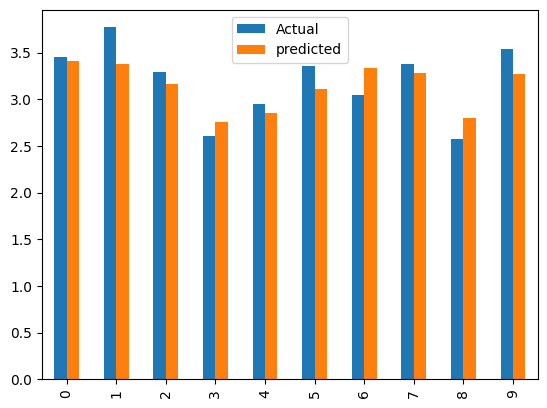

In [ ]:
evaluate.head(10).plot(kind = "bar")

**Kesimpulan**

Grafik perbandingan nilai aktual dan prediksi memberikan gambaran visual yang cepat tentang kinerja model. Namun, untuk mendapatkan pemahaman yang lebih komprehensif, kita perlu menganalisis hasil secara lebih detail menggunakan metrik evaluasi dan teknik visualisasi lainnya.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
# R2 Score
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.5229294387787269


In [ ]:
# Mean Absolute Error (MAE)
print(f"MSE Score: {mean_absolute_error(y_test, y_pred)}")

MSE Score: 0.1598704423376779


In [ ]:
# Mean Squared Error (MSE)
print(f"MSE Score: {mean_squared_error(y_test, y_pred)}")

MSE Score: 0.041295509250944516


### **Interpretasi**



*   **Model memiliki kinerja yang cukup baik:** Nilai R-squared yang cukup tinggi menunjukkan bahwa model mampu menjelaskan sebagian besar variabilitas dalam data.

*   **Masih ada ruang untuk perbaikan:** Nilai MAE dan MSE menunjukkan bahwa masih ada beberapa kesalahan dalam prediksi model.

*   **Perlu analisis lebih lanjut:** Untuk mendapatkan pemahaman yang lebih baik tentang kinerja model, perlu dilakukan analisis lebih lanjut, seperti:
    *   **Visualisasi**: Membuat plot perbandingan antara nilai aktual dan nilai prediksi untuk melihat pola kesalahan.
    *   **Analisis residual**: Menganalisis residual (selisih antara nilai aktual dan nilai prediksi) untuk melihat apakah ada pola atau tren tertentu.
    *   **Feature engineering:** Mencoba menambahkan atau mengubah fitur untuk meningkatkan kinerja model.
    *   **Tuning hyperparameter:** Menyesuaikan parameter model untuk mendapatkan hasil yang lebih baik.






In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/student_lifestyle_dataset.csv')

# Encode the target variable (Stress_Level) into numeric labels
label_encoder = LabelEncoder()
data['Stress_Level'] = label_encoder.fit_transform(data['Stress_Level'])

# Define features (X) and target (y)
X = data[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
          'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
y = data['Stress_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train and evaluate Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Train and evaluate Decision Tree
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Train and evaluate Random Forest
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

# Print the results
print("Logistic Regression Accuracy:", accuracy_logistic)
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))

print("Decision Tree Accuracy:", accuracy_tree)
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_tree))

print("Random Forest Accuracy:", accuracy_forest)
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_forest))


Logistic Regression Accuracy: 0.85
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       206
           1       0.85      0.91      0.88        67
           2       0.82      0.73      0.78       127

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

Decision Tree Accuracy: 1.0
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00       127

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Random Forest Accuracy: 1.0
Classification Report for Random Forest:
               p

*Jika Logistic Regression memiliki akurasi mendekati Random Forest, hubungan antara variabel gaya hidup dan tingkat stres cenderung linear.
*Jika Random Forest jauh lebih unggul, variabel gaya hidup memiliki  hubungan non-linear yang lebih kompleks, dan model ensemble diperlukan untuk memetakan pola.
*Jika Decision Tree memiliki akurasi mirip Random Forest tetapi laporan klasifikasinya menunjukkan ketidakseimbangan antar kelas, maka Decision Tree kemungkinan overfitting.

### Hyperparameter

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Membaca data dari file CSV
file_path = "/content/student_lifestyle_dataset.csv"
df = pd.read_csv(file_path)

# Periksa kolom dalam dataset
print("Kolom dalam dataset:", df.columns)

# Konversi semua kolom non-numerik menjadi dummy
df_with_dummies = pd.get_dummies(data=df, drop_first=True)

# Tentukan fitur dan target
X = df_with_dummies.drop(columns=["GPA"])  # Ganti 'GPA' sesuai nama kolom target
y = df_with_dummies["GPA"]

# Definisikan model dasar
ridge = Ridge()

# Definisikan parameter yang akan dituning
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']  # Solver untuk Ridge
}

# Lakukan Grid Search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Tampilkan hasil terbaik
def best_hyperparameters(grid):
    print("Best Hyperparameters:", grid.best_params_)
    print("Best Score (neg MSE):", grid.best_score_)

best_hyperparameters(grid_search)


Kolom dalam dataset: Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')
Best Hyperparameters: {'alpha': 10.0, 'solver': 'svd'}
Best Score (neg MSE): -0.04125298534416462


### Evaluasi dan Best Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Membaca data dari file CSV
file_path = ("/content/student_lifestyle_dataset.csv")
df = pd.read_csv(file_path)

# Hapus kolom yang tidak relevan
if 'Student_ID' in df.columns:
    df = df.drop(columns=['Student_ID'])

# Konversi kolom kategorikal menjadi dummy
if 'Stress_Level' in df.columns:
    df = pd.get_dummies(df, columns=['Stress_Level'], drop_first=True)

# Tentukan fitur dan target
X = df.drop(columns=['GPA'])
y = df['GPA']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan model dasar
ridge = Ridge()

# Definisikan parameter grid untuk tuning
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}

# Lakukan Grid Search untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_

# Evaluasi model terbaik pada data uji
y_pred = best_model.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score (neg MSE):", grid_search.best_score_)
print("\nEvaluation on Test Data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Best Hyperparameters: {'alpha': 10.0, 'solver': 'auto'}
Best Cross-Validation Score (neg MSE): -0.04087940862087667

Evaluation on Test Data:
Mean Squared Error (MSE): 0.0423
Mean Absolute Error (MAE): 0.1644
R-squared (R²): 0.5474
